# Bike Sharing

## Importing Libraries

In [650]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import statsmodels
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

In [651]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')


### Import Data

In [652]:
#Read CSV File
data = pd.read_csv("day.csv")

In [653]:
# Read first 5 rows of the file 
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [654]:
# Get Shape of the data
data.shape

(730, 16)

In [655]:
# get column info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### from data info we can see there is no data with null value

In [656]:
#Describe Data
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Clean Up

In [657]:
# we can check the data based on mnth & yr columns we can remove dteday column, when yr = 0 indicates 2018 and when it's 1 it indicates 2019
data.drop(columns={"dteday"},axis=1,inplace=True,errors='ignore')

In [658]:
data.shape

(730, 15)

In [659]:
# The columns instant is not useful for analysing target variable
data.drop(columns={"instant"},axis=1, inplace=True,errors='ignore')

In [660]:
data.shape

(730, 14)

<Axes: ylabel='temp'>

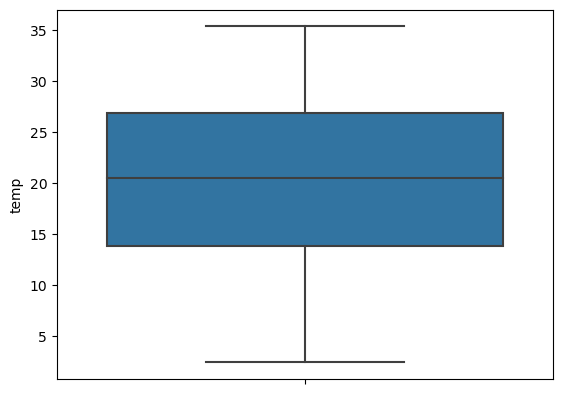

In [661]:
sns.boxplot(data=data,y='temp')

<Axes: ylabel='windspeed'>

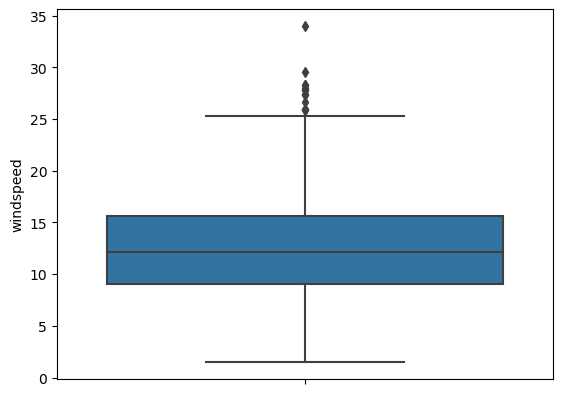

In [662]:
sns.boxplot(data=data, y='windspeed')

<Axes: ylabel='hum'>

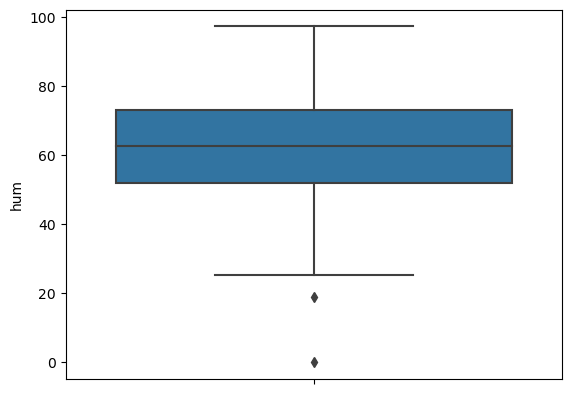

In [663]:
sns.boxplot(data=data,y='hum')

### Cleaning up outliers

In [664]:
# From abov egraph we can see Humidity and windspeed has outliers , so cleaning up the same
data = data.drop(index = data[(data['hum'] < 20)].index)

data = data.drop(index = data[(data['windspeed'] > 25)].index)

In [665]:
data.info()
# We can see data size is reduced to 712

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      712 non-null    int64  
 1   yr          712 non-null    int64  
 2   mnth        712 non-null    int64  
 3   holiday     712 non-null    int64  
 4   weekday     712 non-null    int64  
 5   workingday  712 non-null    int64  
 6   weathersit  712 non-null    int64  
 7   temp        712 non-null    float64
 8   atemp       712 non-null    float64
 9   hum         712 non-null    float64
 10  windspeed   712 non-null    float64
 11  casual      712 non-null    int64  
 12  registered  712 non-null    int64  
 13  cnt         712 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 83.4 KB


In [666]:
#check for unique values in data
data.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          492
atemp         674
hum           582
windspeed     631
casual        595
registered    662
cnt           680
dtype: int64

In [667]:
# As per Data Dictionary weathersit should have 4 unique values, but it shows only 3, check those values
data["weathersit"].unique()

# Value 4 : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog is not available

array([2, 1, 3])

### As per data dictionary few variables have categorial values associated with them. Convert these feature value of the variables to categorial value

In [668]:
#replacing weathersit based on data dictionary
#         1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
data["weathersit"].replace({1:"Clear/Partly Cloudy",2:"Misty",3:"Light Rain/Thunderstorm",4:"Heavy Rain/Thunderstorm/Snow"},inplace=True)


In [669]:
data["weathersit"].unique()

array(['Misty', 'Clear/Partly Cloudy', 'Light Rain/Thunderstorm'],
      dtype=object)

In [672]:
#replacing season based on data dictionary
#season (1:spring, 2:summer, 3:fall, 4:winter)
data["season"].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)

In [673]:
data["season"].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [674]:
#replacing year
#data["yr"].replace({0:2018,1:2019},inplace=True)

In [675]:
# replacing months with actual values
data["mnth"].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr' , 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'},inplace=True)

In [676]:
#replacing weekday
data['weekday'].replace({1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday",0:"Sunday"},inplace=True)

In [677]:
data.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Saturday,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Sunday,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Monday,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Tuesday,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Wednesday,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,spring,0,Jan,0,Thursday,1,Clear/Partly Cloudy,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,spring,0,Jan,0,Friday,1,Misty,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,spring,0,Jan,0,Saturday,0,Misty,6.765000,8.11270,53.5833,17.875868,68,891,959
8,spring,0,Jan,0,Sunday,0,Clear/Partly Cloudy,5.671653,5.80875,43.4167,24.250650,54,768,822
9,spring,0,Jan,0,Monday,1,Clear/Partly Cloudy,6.184153,7.54440,48.2917,14.958889,41,1280,1321


### Exploratory Data Analysis

#### Understanding the Data

<Axes: xlabel='weathersit', ylabel='cnt'>

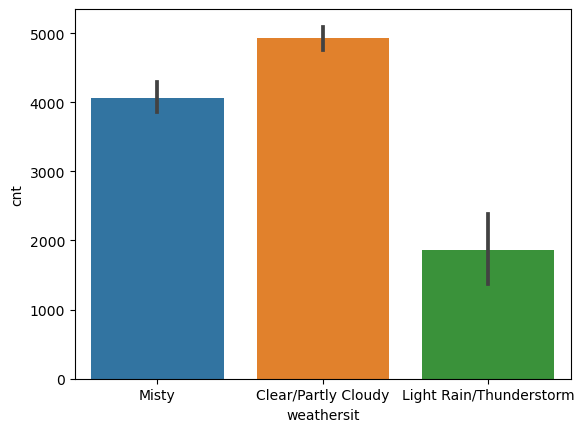

In [678]:
sns.barplot(data=data,x='weathersit',y='cnt')

Observation : Rentals are less when there is Light Rain/ Thunderstorm

<Axes: xlabel='season', ylabel='cnt'>

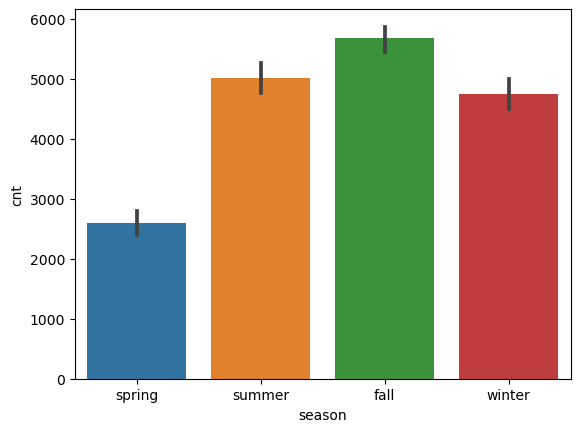

In [679]:
sns.barplot(data=data, x='season' ,y='cnt')

Observation : Rentals are less in Spring season and more in fall season

##### Analysing Numeric variables <br> <br> Creating Pair plot for all numeric variables

In [680]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      712 non-null    object 
 1   yr          712 non-null    int64  
 2   mnth        712 non-null    object 
 3   holiday     712 non-null    int64  
 4   weekday     712 non-null    object 
 5   workingday  712 non-null    int64  
 6   weathersit  712 non-null    object 
 7   temp        712 non-null    float64
 8   atemp       712 non-null    float64
 9   hum         712 non-null    float64
 10  windspeed   712 non-null    float64
 11  casual      712 non-null    int64  
 12  registered  712 non-null    int64  
 13  cnt         712 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 83.4+ KB


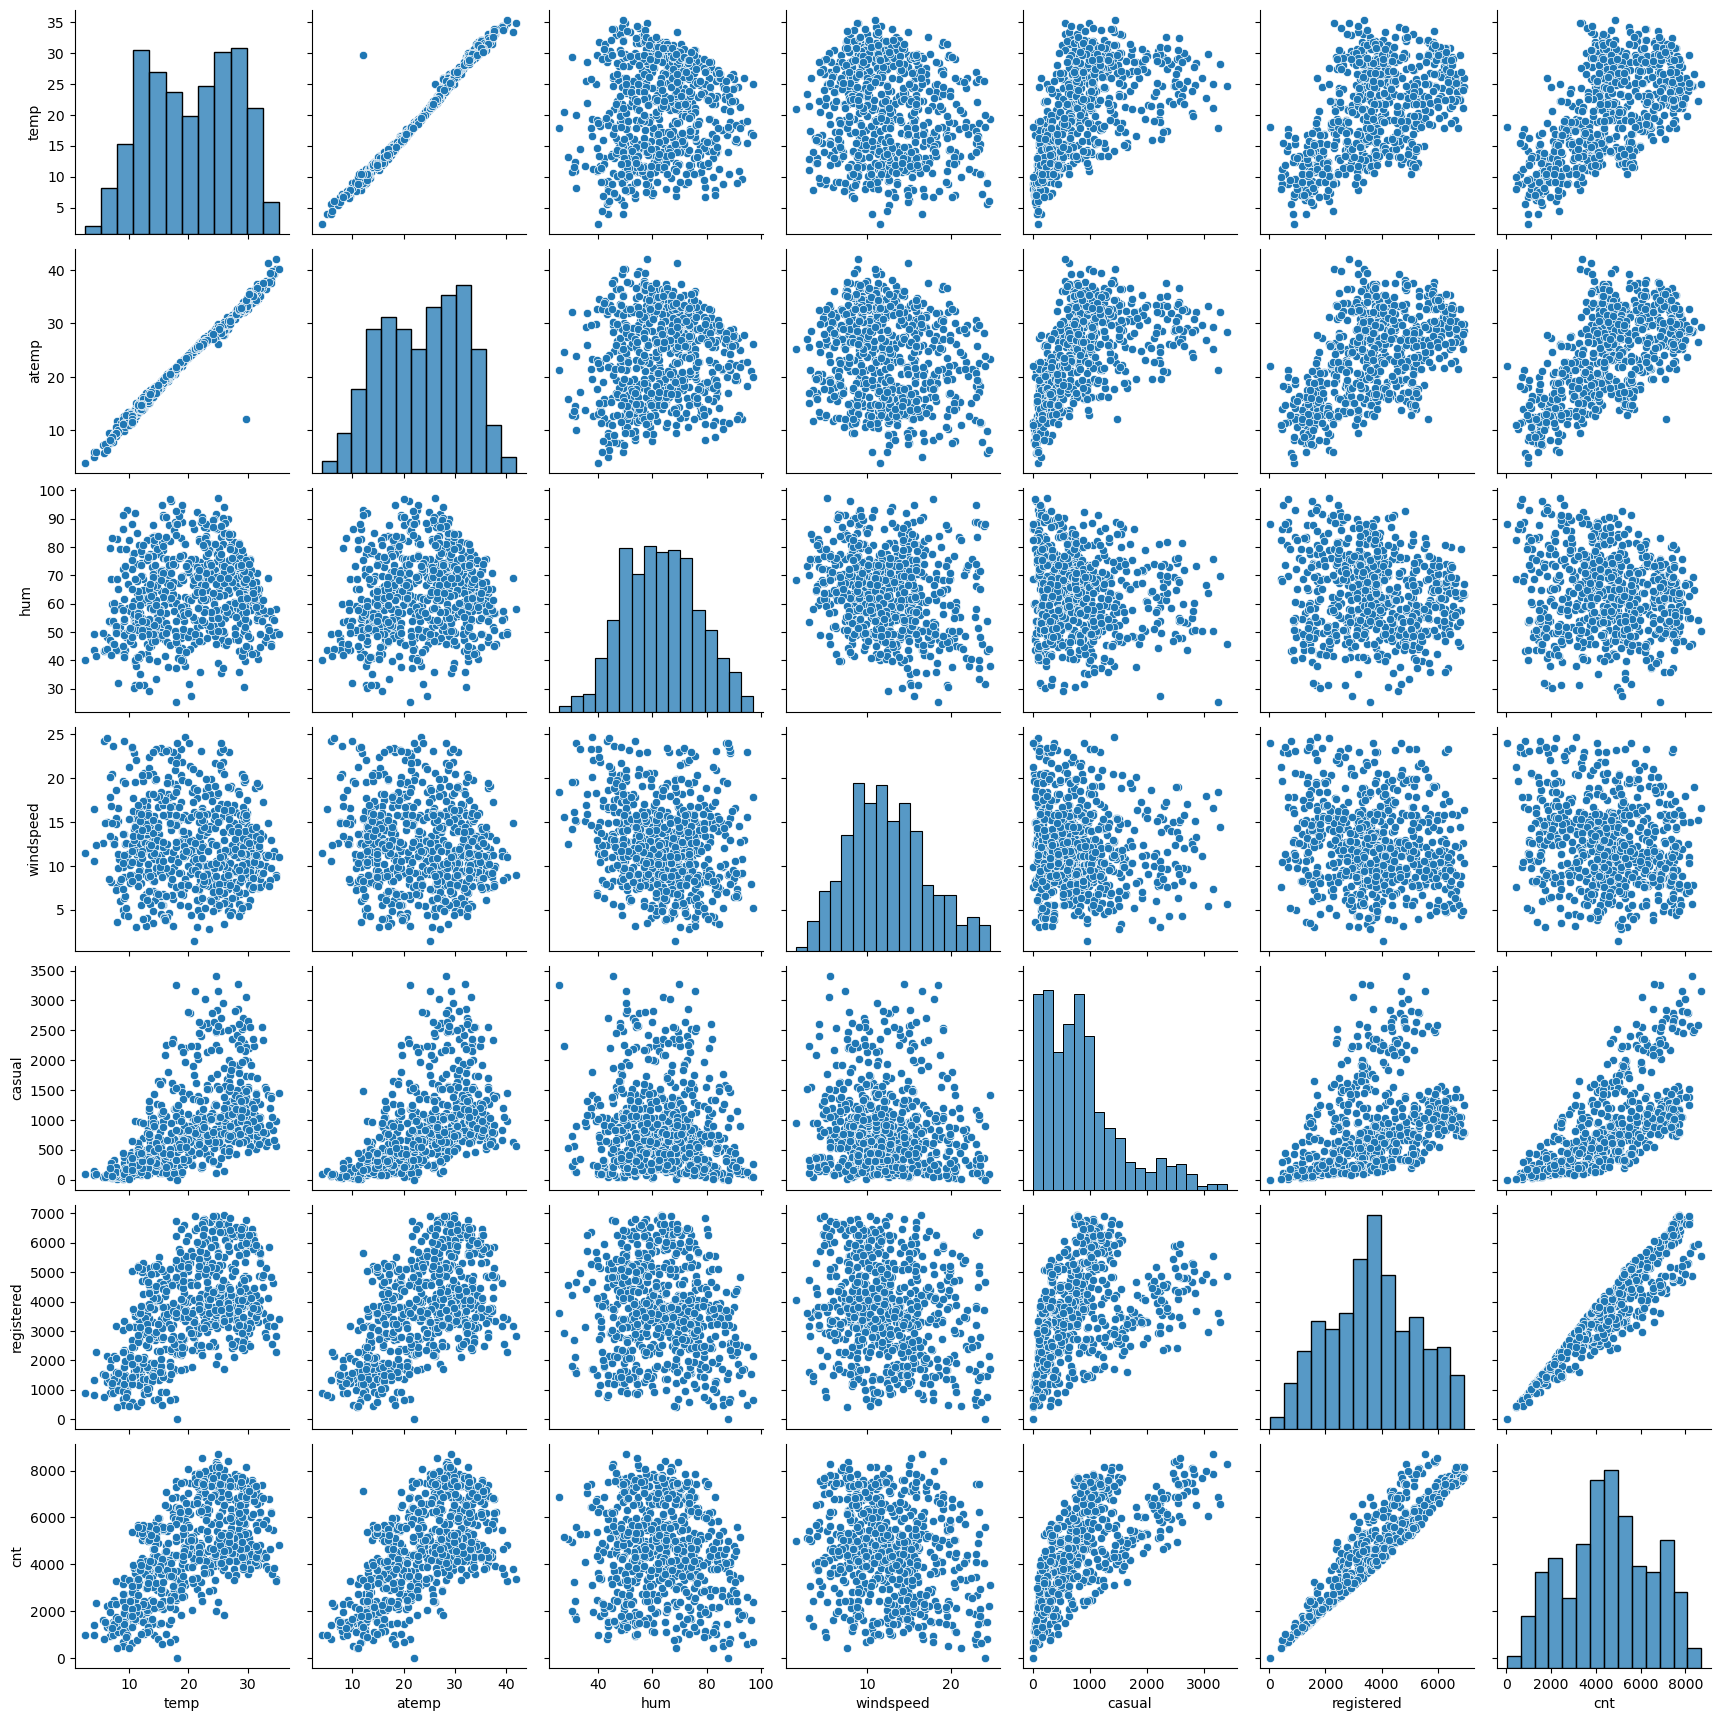

In [682]:
sns.pairplot(data[["temp","atemp","hum","windspeed","casual","registered","cnt"]])
plt.show()

## Observation from Pair Plot

#### temp variable : 
    * temp is highly correlated with atemp <br> <br>
    * temp is correlated with cnt,registered and casual <br> <br>
#### atemp variable :
    * atemp is correlated with cnt,registered and casual <br> <br>
    * cnt= casual+registered so registered is correlated with cnt and casual
    


In [683]:
# Dropping casual and registered as cnt=casual+registered
data.drop(columns={"casual","registered"},axis=1, inplace=True,errors="ignore")

In [684]:
#checking correlation
data.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.009281,0.002243,0.062233,0.062482,-0.115367,-0.031494,0.581504
holiday,0.009281,1.000000,-0.257310,-0.031527,-0.035879,-0.021225,0.019988,-0.073440
workingday,0.002243,-0.257310,1.000000,0.048680,0.046756,0.022930,-0.004693,0.053177
temp,0.062233,-0.031527,0.048680,1.000000,0.991734,0.109541,-0.134704,0.628518
atemp,0.062482,-0.035879,0.046756,0.991734,1.000000,0.121314,-0.159282,0.631825
hum,-0.115367,-0.021225,0.022930,0.109541,0.121314,1.000000,-0.203894,-0.135596
windspeed,-0.031494,0.019988,-0.004693,-0.134704,-0.159282,-0.203894,1.000000,-0.206284
cnt,0.581504,-0.073440,0.053177,0.628518,0.631825,-0.135596,-0.206284,1.000000


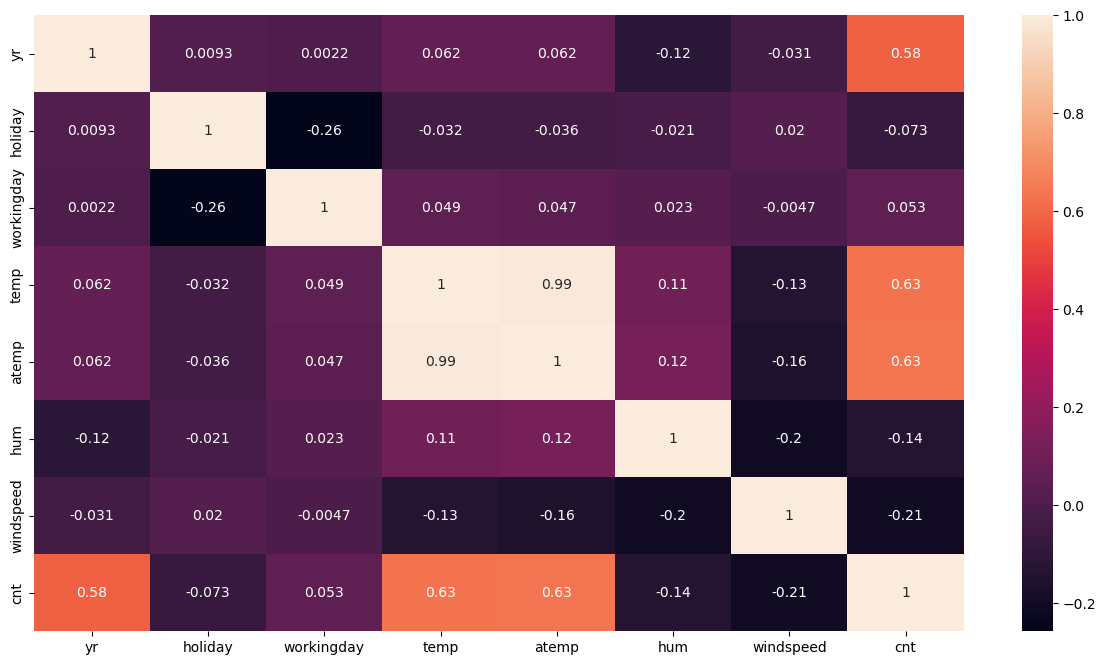

In [685]:
#Heatmap for correlation
plt.figure(figsize=(15,8))
sns.heatmap(data=data.corr(), annot=True)
plt.show()

#### Observation from Heat Map
According to the above heatmap the correlation between atemp and temp is 0.99, hence we can ignore any one of these two columns <br> <br> atemp and temp are having next highest correlation coefficient <br> <br> yr is also corrleated with cnt.<br> <br> holiday,hum and windspeed are negatively correlated with cnt

In [686]:
#Drop atemp column
data.drop(columns={"atemp"},axis=1,inplace=True,errors="ignore")

In [687]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      712 non-null    object 
 1   yr          712 non-null    int64  
 2   mnth        712 non-null    object 
 3   holiday     712 non-null    int64  
 4   weekday     712 non-null    object 
 5   workingday  712 non-null    int64  
 6   weathersit  712 non-null    object 
 7   temp        712 non-null    float64
 8   hum         712 non-null    float64
 9   windspeed   712 non-null    float64
 10  cnt         712 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 66.8+ KB


In [688]:
data.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Misty,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Misty,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear/Partly Cloudy,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear/Partly Cloudy,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear/Partly Cloudy,9.305237,43.6957,12.522300,1600
5,spring,0,Jan,0,Thursday,1,Clear/Partly Cloudy,8.378268,51.8261,6.000868,1606
6,spring,0,Jan,0,Friday,1,Misty,8.057402,49.8696,11.304642,1510
7,spring,0,Jan,0,Saturday,0,Misty,6.765000,53.5833,17.875868,959
8,spring,0,Jan,0,Sunday,0,Clear/Partly Cloudy,5.671653,43.4167,24.250650,822
9,spring,0,Jan,0,Monday,1,Clear/Partly Cloudy,6.184153,48.2917,14.958889,1321


### Categorial Variable Analysis
Analyse Categorical variables("season","yr","mnth","holiday","weekday","workingday","weathersit") against cnt column

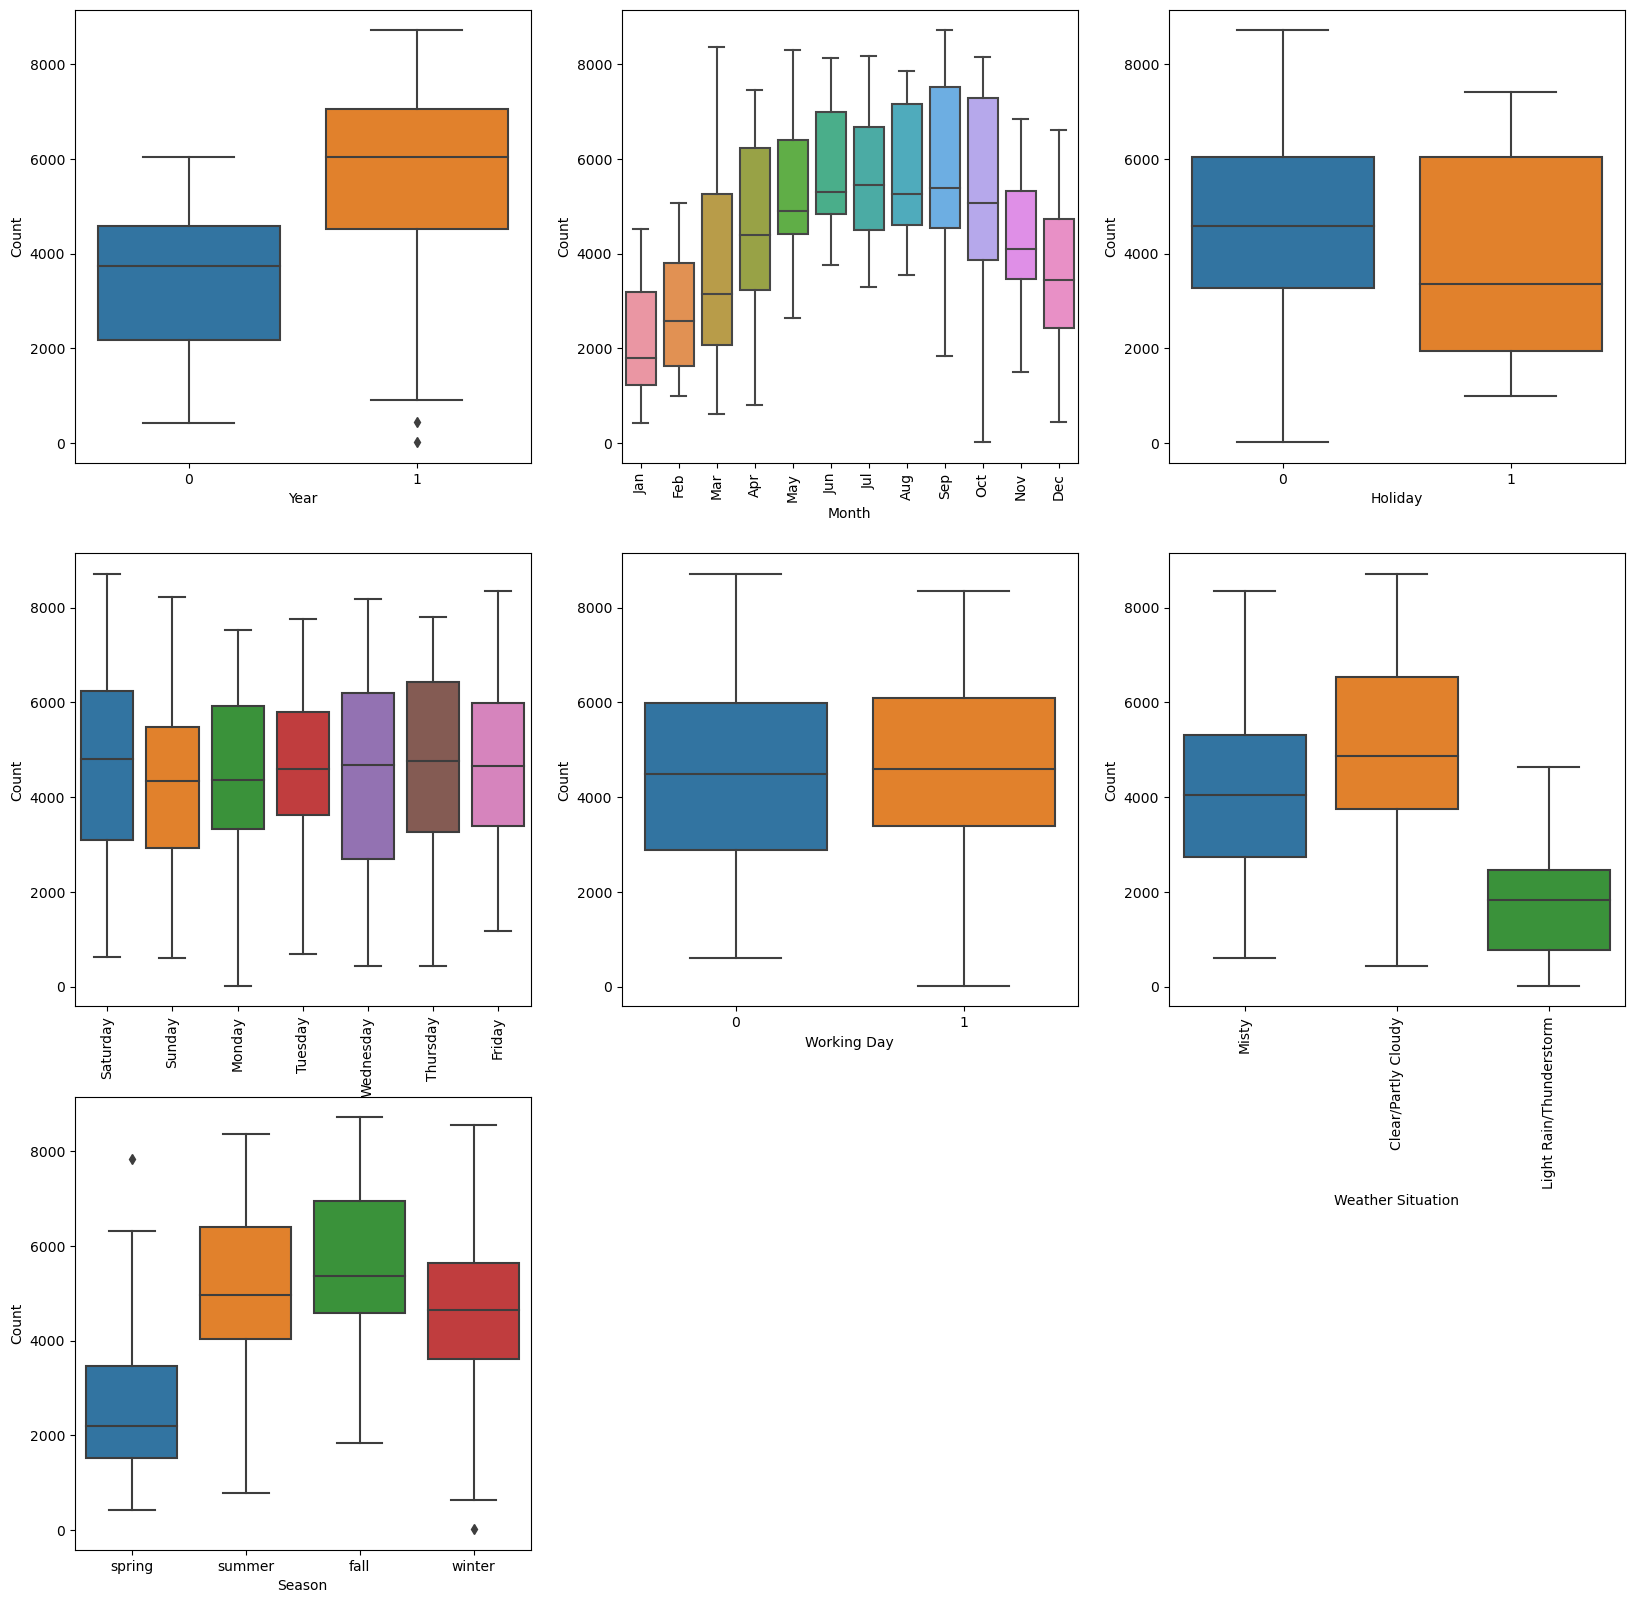

In [689]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sns.boxplot(data=data,x="yr",y="cnt")
plt.xlabel("Year")
plt.ylabel("Count")

plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("Count")

plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.xlabel("Holiday")
plt.ylabel("Count")

plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.xticks(rotation=90)
plt.xlabel("Weekday")
plt.ylabel("Count")

plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.xlabel("Working Day")
plt.ylabel("Count")

plt.subplot(3,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.xlabel("Weather Situation")
plt.xticks(rotation=90)
plt.ylabel("Count")


plt.subplot(3,3,7)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.xlabel("Season")
plt.ylabel("Count")

plt.show()

Observations : <br>
Year : The Demand for bikes is more in the year 2019 <br>
Month : The demand is higher in June, August, September and October and least in January <br>
Holiday : Holidays didnot make any specific impact <br>
Season : The demand is high during summer and fall seasons <br>
Weather Situation : The demand is high when weather is clear/partially cloudy, and is low when it's Raining

### Data Preparation

#### Encoding <br>
Convert Binary Categorical Variables to 1 and 0

In [690]:
data.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Misty,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Misty,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear/Partly Cloudy,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear/Partly Cloudy,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear/Partly Cloudy,9.305237,43.6957,12.522300,1600
5,spring,0,Jan,0,Thursday,1,Clear/Partly Cloudy,8.378268,51.8261,6.000868,1606
6,spring,0,Jan,0,Friday,1,Misty,8.057402,49.8696,11.304642,1510
7,spring,0,Jan,0,Saturday,0,Misty,6.765000,53.5833,17.875868,959
8,spring,0,Jan,0,Sunday,0,Clear/Partly Cloudy,5.671653,43.4167,24.250650,822
9,spring,0,Jan,0,Monday,1,Clear/Partly Cloudy,6.184153,48.2917,14.958889,1321


In [691]:
# There are two binay categorical variables : holiday and working day
print(data["workingday"].unique())
print(data["holiday"].unique())

[0 1]
[0 1]


These 2 categorial variables are already in binary format so no need to convert<br>
#### Convert categorial variables to dummy variable

In [692]:
# Dropping redundant dummy variables
#i.e the same o/p can be achieved by using n-1 variables instead of n variables
#Concat once dummies are created

seasons = pd.get_dummies(data['season'],drop_first=True)
data = pd.concat([data,seasons],axis=1)

months= pd.get_dummies(data['mnth'],drop_first=True)
data = pd.concat([data,months],axis=1)

weekdays= pd.get_dummies(data['weekday'],drop_first=True)
data = pd.concat([data,weekdays],axis=1)

weathersituations= pd.get_dummies(data['weathersit'],drop_first=True)
data = pd.concat([data,weathersituations],axis=1)

In [693]:
data.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain/Thunderstorm,Misty
0,spring,0,Jan,0,Saturday,0,Misty,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sunday,0,Misty,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Monday,1,Clear/Partly Cloudy,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tuesday,1,Clear/Partly Cloudy,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wednesday,1,Clear/Partly Cloudy,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0
5,spring,0,Jan,0,Thursday,1,Clear/Partly Cloudy,8.378268,51.8261,6.000868,...,0,0,0,0,0,1,0,0,0,0
6,spring,0,Jan,0,Friday,1,Misty,8.057402,49.8696,11.304642,...,0,0,0,0,0,0,0,0,0,1
7,spring,0,Jan,0,Saturday,0,Misty,6.765000,53.5833,17.875868,...,0,0,0,1,0,0,0,0,0,1
8,spring,0,Jan,0,Sunday,0,Clear/Partly Cloudy,5.671653,43.4167,24.250650,...,0,0,0,0,1,0,0,0,0,0
9,spring,0,Jan,0,Monday,1,Clear/Partly Cloudy,6.184153,48.2917,14.958889,...,0,0,1,0,0,0,0,0,0,0


In [694]:
#Dropping these columns for which dummy variables were created
data.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True,errors="ignore")

In [695]:
data.head(10)

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain/Thunderstorm,Misty
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,1,8.378268,51.8261,6.000868,1606,1,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,1,8.057402,49.8696,11.304642,1510,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,6.765000,53.5833,17.875868,959,1,0,0,...,0,0,0,1,0,0,0,0,0,1
8,0,0,0,5.671653,43.4167,24.250650,822,1,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,1,6.184153,48.2917,14.958889,1321,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [696]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   yr                       712 non-null    int64  
 1   holiday                  712 non-null    int64  
 2   workingday               712 non-null    int64  
 3   temp                     712 non-null    float64
 4   hum                      712 non-null    float64
 5   windspeed                712 non-null    float64
 6   cnt                      712 non-null    int64  
 7   spring                   712 non-null    uint8  
 8   summer                   712 non-null    uint8  
 9   winter                   712 non-null    uint8  
 10  Aug                      712 non-null    uint8  
 11  Dec                      712 non-null    uint8  
 12  Feb                      712 non-null    uint8  
 13  Jan                      712 non-null    uint8  
 14  Jul                      7

### Splitting the Data into Training and Testing Sets

In [697]:
#Splitting the data into 70:30 Train:test sets
from sklearn.model_selection import train_test_split

np.random.seed(0)
data_train, data_test = train_test_split(data, train_size =0.7,random_state=100)
print(data_train.shape)
print(data_test.shape)

(498, 29)
(214, 29)


In [698]:
data_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain/Thunderstorm,Misty
423,1,0,1,14.725847,39.5833,12.958939,4363,1,0,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
503,1,0,0,24.600000,45.6250,5.626325,8294,0,1,0,...,0,0,0,1,0,0,0,0,0,0
116,0,0,1,25.420000,83.5417,20.917400,3872,0,1,0,...,0,0,0,0,0,0,0,1,0,1
581,1,0,0,31.535847,65.2500,19.458207,5464,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Scaling <br>
Scaller needs to be applied to all the numeric columns except the '0-1' and 'dummy' variables

In [699]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

#Create a list of numerical variables
num_vars = ['temp','hum','windspeed','cnt']

# Fit on data
data_train[num_vars] = scaler.fit_transform(data_train[num_vars])

In [700]:
data_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain/Thunderstorm,Misty
423,1,0,1,0.373860,0.140157,0.494614,0.499425,1,0,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,0,0.245101,0.271097,0.949641,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
503,1,0,0,0.673950,0.230569,0.178102,0.951680,0,1,0,...,0,0,0,1,0,0,0,0,0,0
116,0,0,1,0.698871,0.797978,0.838141,0.442936,0,1,0,...,0,0,0,0,0,0,0,1,0,1
581,1,0,0,0.884740,0.524249,0.775155,0.626093,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [701]:
data_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain/Thunderstorm,Misty
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,...,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,0.504016,0.030120,0.696787,0.541922,0.499220,0.468410,0.521051,0.238956,0.238956,0.251004,...,0.082329,0.078313,0.134538,0.126506,0.146586,0.144578,0.136546,0.158635,0.028112,0.367470
std,0.500487,0.171091,0.460109,0.229850,0.205010,0.209357,0.223827,0.426875,0.426875,0.434027,...,0.275142,0.268934,0.341573,0.332753,0.354049,0.352029,0.343713,0.365702,0.165460,0.482601
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.345921,0.314743,0.367637,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.537923,0.500556,0.440645,0.527266,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745338,0.647083,0.606998,0.697308,0.000000,0.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


After applying MinMaxScaler all values has been mapped between 0 and 1 , 0 being the minimum value and 1 max

### Building the Model

<Axes: >

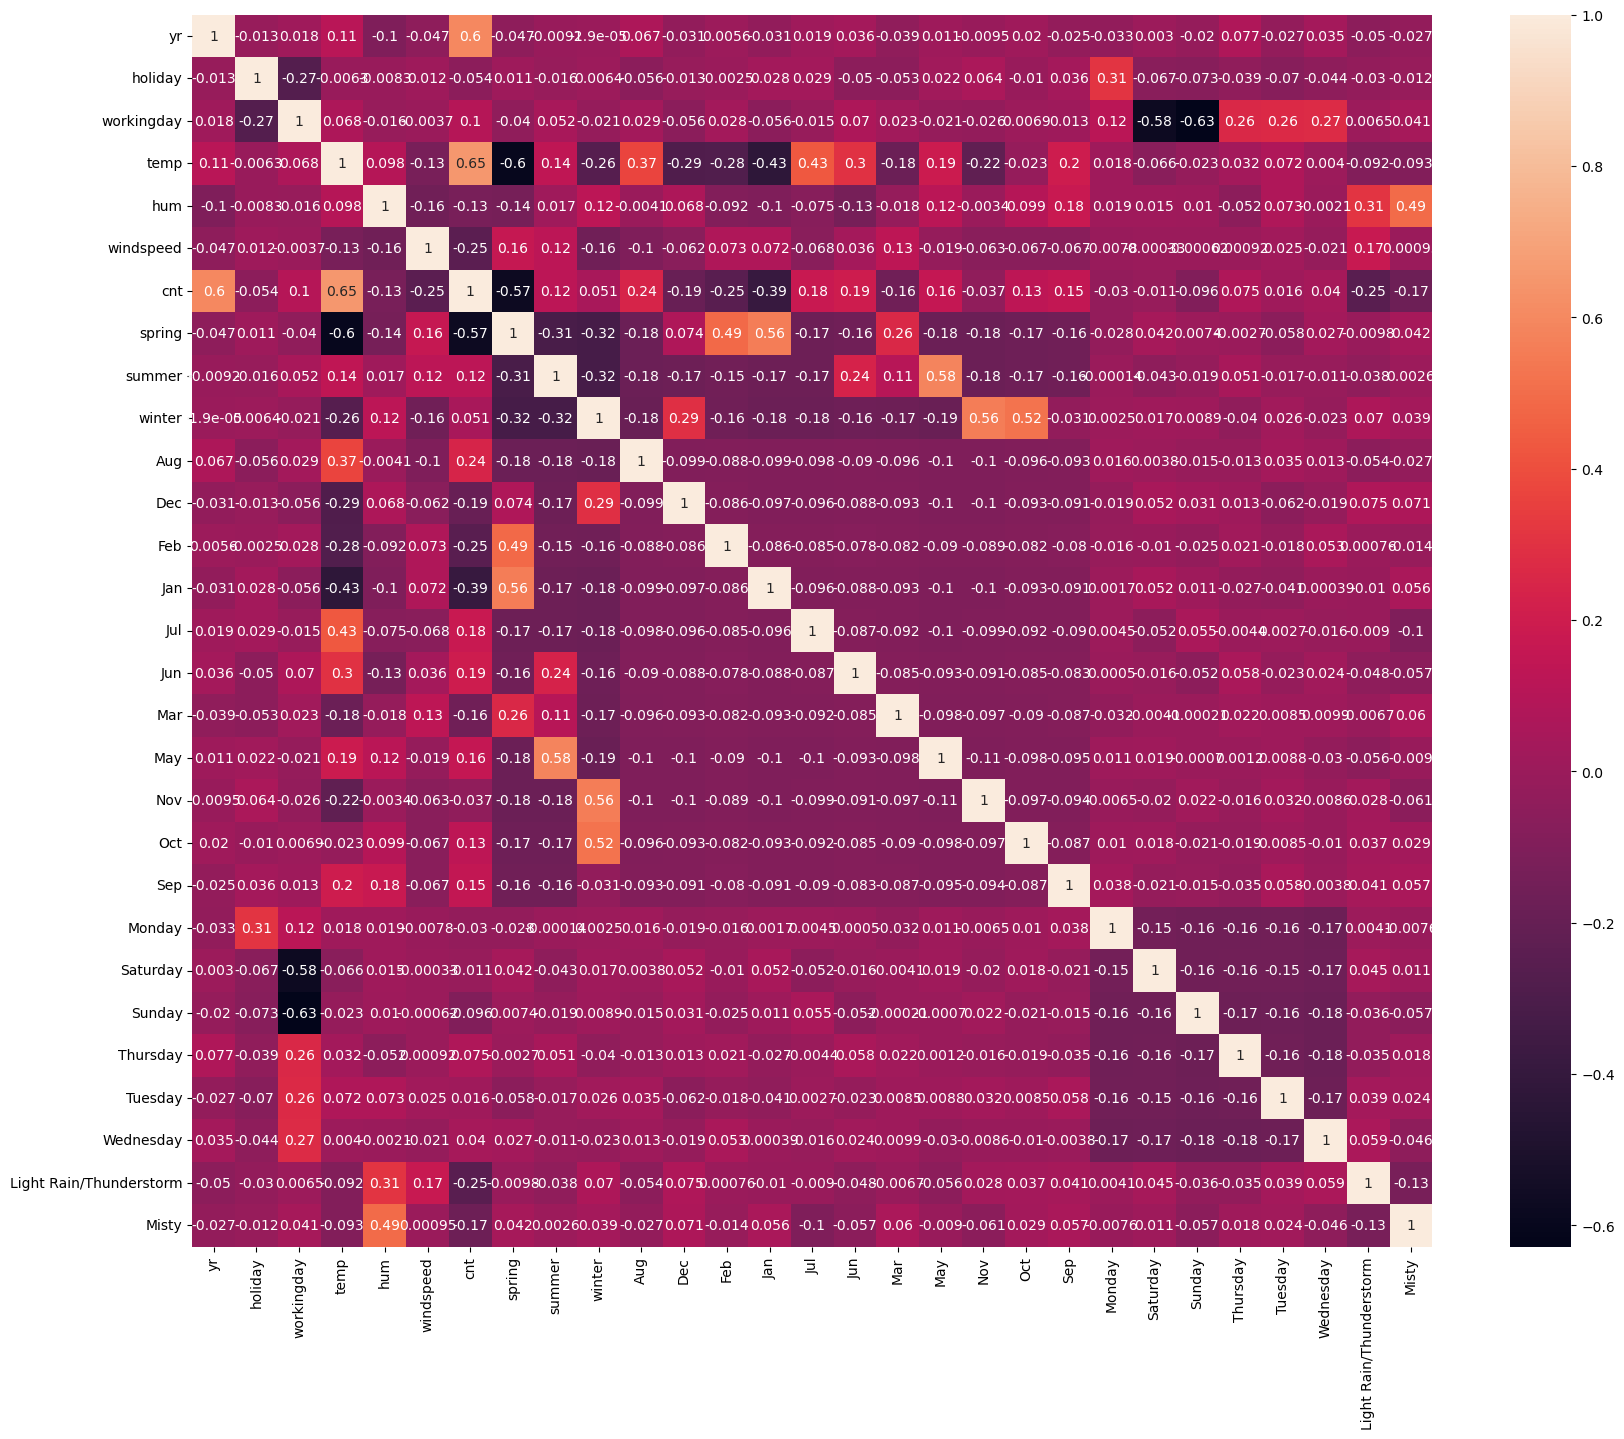

In [702]:
plt.figure(figsize=[20,16])
sns.heatmap(data_train.corr(),annot=True)

#### Divide into X and Y Train Sets for model building

In [703]:
X_train = data_train
y_train = data_train.pop('cnt')

In [704]:
X_train.head()
# all feature variables are assigned to x_train

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain/Thunderstorm,Misty
423,1,0,1,0.373860,0.140157,0.494614,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,0,0.245101,0.271097,0.949641,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
503,1,0,0,0.673950,0.230569,0.178102,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
116,0,0,1,0.698871,0.797978,0.838141,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
581,1,0,0,0.884740,0.524249,0.775155,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [705]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 423 to 534
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   yr                       498 non-null    int64  
 1   holiday                  498 non-null    int64  
 2   workingday               498 non-null    int64  
 3   temp                     498 non-null    float64
 4   hum                      498 non-null    float64
 5   windspeed                498 non-null    float64
 6   spring                   498 non-null    uint8  
 7   summer                   498 non-null    uint8  
 8   winter                   498 non-null    uint8  
 9   Aug                      498 non-null    uint8  
 10  Dec                      498 non-null    uint8  
 11  Feb                      498 non-null    uint8  
 12  Jan                      498 non-null    uint8  
 13  Jul                      498 non-null    uint8  
 14  Jun                     

In [706]:
X_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain/Thunderstorm,Misty
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,...,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,0.504016,0.030120,0.696787,0.541922,0.499220,0.468410,0.238956,0.238956,0.251004,0.092369,...,0.082329,0.078313,0.134538,0.126506,0.146586,0.144578,0.136546,0.158635,0.028112,0.367470
std,0.500487,0.171091,0.460109,0.229850,0.205010,0.209357,0.426875,0.426875,0.434027,0.289838,...,0.275142,0.268934,0.341573,0.332753,0.354049,0.352029,0.343713,0.365702,0.165460,0.482601
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.345921,0.314743,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.537923,0.500556,0.440645,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745338,0.647083,0.606998,0.000000,0.000000,0.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [707]:
X_train["workingday"].unique()

array([1, 0])

In [708]:
y_train.head()

423    0.499425
728    0.204096
503    0.951680
116    0.442936
581    0.626093
Name: cnt, dtype: float64

## Building the model using Stats Model

Variance Inflation Factor or VIF, indicates how much the feature variables are correlated with each other.
<br> formula  $ VIF_i = \frac{1}{1 - {R_i}^2} $ <br>
Cleaning up Model checks : <br>
High p-value, high VIF - > Drop directly <br>
High-low: <br>
High p, low VIF -> remove these first <br>
Low p, high VIF -> Remove this after the ones above <br>
Low p, Low VIF -> Keep it <br>

In [709]:

from sklearn.linear_model import LinearRegression
from statsmodels import api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [710]:
# Calculate the VIFs for the new model
def get_VIF(col,X_train):
    vif = pd.DataFrame()
    vif['Features'] = col
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    display(vif)

### RFE (Recursive Feature Elimination)

In [711]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [712]:
# Running RFE with the output number of the variable equal to 18
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 18)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [713]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('Aug', False, 2),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', False, 2),
 ('Jun', False, 2),
 ('Mar', False, 2),
 ('May', False, 2),
 ('Nov', False, 2),
 ('Oct', False, 2),
 ('Sep', True, 1),
 ('Monday', False, 2),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 2),
 ('Tuesday', False, 2),
 ('Wednesday', False, 2),
 ('Light Rain/Thunderstorm', True, 1),
 ('Misty', False, 2)]

In [714]:
col = X_train.columns[rfe.support_] ## variables suggested by RFE
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'Dec', 'Jan', 'Sep', 'Saturday', 'Sunday',
       'Light Rain/Thunderstorm'],
      dtype='object')

In [715]:
X_train.columns[~rfe.support_] ## rejected variables

Index(['summer', 'Aug', 'Feb', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Monday', 'Thursday', 'Tuesday', 'Wednesday', 'Misty'],
      dtype='object')

From here  will continue with stats model

### Building model using statsmodel, for the detailed statistics

### Model 1

In [716]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [717]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [718]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [719]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     212.0
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          2.92e-190
Time:                        21:38:40   Log-Likelihood:                 512.76
No. Observations:                 498   AIC:                            -997.5
Df Residuals:                     484   BIC:                            -938.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [720]:
get_VIF(col,X_train_rfe)

,Features,VIF
2,workingday,30.70
12,Sunday,7.24
11,Saturday,6.35
6,spring,2.79
3,temp,2.77
1,holiday,2.32
7,winter,1.91
9,Jan,1.58
4,hum,1.24
8,Dec,1.23


In [721]:
# No fetaure has P value of holiday is 0.309
X_train_rfe = X_train_rfe.drop(["holiday"], axis = 1,errors="ignore")

Rebuilding the model 
#### Model 2

In [722]:
# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() # Running the linear model

In [723]:
#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     212.0
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          2.92e-190
Time:                        21:40:18   Log-Likelihood:                 512.76
No. Observations:                 498   AIC:                            -997.5
Df Residuals:                     484   BIC:                            -938.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [724]:
get_VIF(X_train_rfe.columns,X_train_rfe)

,Features,VIF
0,const,77.15
2,workingday,7.35
12,Sunday,5.02
11,Saturday,4.57
6,spring,2.79
3,temp,2.77
7,winter,1.91
9,Jan,1.58
4,hum,1.24
8,Dec,1.23


 #### Model 3

In [725]:
# Dropping Sunday  since its P value is 0.399
X_train_rfe = X_train_rfe.drop(["Sunday"], axis = 1,errors="ignore")

In [726]:
# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() # Running the linear model
#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     229.8
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          2.68e-191
Time:                        21:41:01   Log-Likelihood:                 512.39
No. Observations:                 498   AIC:                            -998.8
Df Residuals:                     485   BIC:                            -944.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [613]:
get_VIF(X_train_rfe.columns,X_train_rfe)

,Features,VIF
0,const,16882996.58
6,spring,2.79
3,temp,2.77
7,winter,1.91
9,Jan,1.57
4,hum,1.24
8,Dec,1.22
12,Light Rain/Thunderstorm,1.20
5,windspeed,1.15
10,Sep,1.08


In [727]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 423 to 534
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   const                    498 non-null    float64
 1   yr                       498 non-null    int64  
 2   workingday               498 non-null    int64  
 3   temp                     498 non-null    float64
 4   hum                      498 non-null    float64
 5   windspeed                498 non-null    float64
 6   spring                   498 non-null    uint8  
 7   winter                   498 non-null    uint8  
 8   Dec                      498 non-null    uint8  
 9   Jan                      498 non-null    uint8  
 10  Sep                      498 non-null    uint8  
 11  Saturday                 498 non-null    uint8  
 12  Light Rain/Thunderstorm  498 non-null    uint8  
dtypes: float64(4), int64(2), uint8(7)
memory usage: 30.6 KB


In [728]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     229.8
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          2.68e-191
Time:                        21:41:46   Log-Likelihood:                 512.39
No. Observations:                 498   AIC:                            -998.8
Df Residuals:                     485   BIC:                            -944.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2889      0.027     10.570      0.000       0.235       0.343
yr                          0.2272      0.008     28.426      0.000       0.212       0.243
workingday                  0.0510      0.010      4.864      0.000       0.030       0.072
temp                        0.4272      0.028     15.001      0.000       0.371       0.483
hum                        -0.1683      0.021     -7.880      0.000      -0.210      -0.126
windspeed                  -0.1162      0.020     -5.783      0.000      -0.156      -0.077
spring                     -0.1082      0.015     -7.032      0.000      -0.138      -0.078
winter                      0.0612      0.013      4.894      0.000       0.037       0.086
Dec                        -0.0443      0.015     -2.896      0.004      -0.074      -0.014
Jan                        -0.0456      0.017     -2.624      0.009      -0.080      -0.011
Sep                         0.0542      0.015      3.577      0.000       0.024       0.084
Saturday                    0.0664      0.015      4.577      0.000       0.038       0.095
Light Rain/Thunderstorm    -0.1825      0.026     -7.024      0.000      -0.234      -0.131
==============================================================================
Omnibus:                      103.415   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              281.492
Skew:                          -1.009   Prob(JB):                     7.50e-62
Kurtosis:                       6.081   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 3 is the final Model
 #### Observation :
 ####  1.There are no feature whose p-Value>0.05 
 ####  2. R-squared:	0.850
 ####  3. Adj. R-squared:	0.847
 ####  4. All VIFs are now below 5.

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [729]:
y_train_cnt = lm.predict(X_train_rfe)

In [730]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [731]:
## Looking at the RMSE

#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_train, y_train_cnt))

0.0864799311073648

Text(0.5, 0, 'Errors')

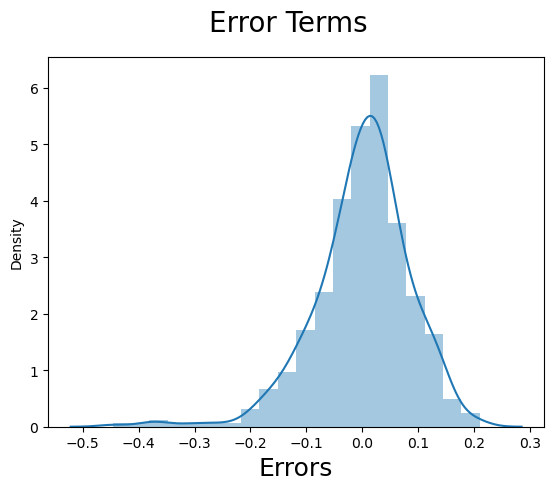

In [732]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### The residuals are normally distributed with a mean 0.

### Patterns in residuals

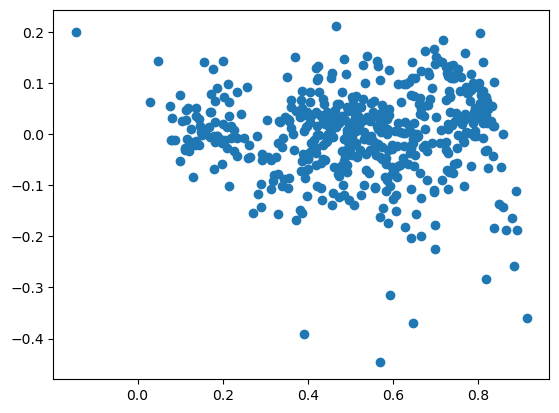

In [733]:
plt.scatter(y_train_cnt,(y_train - y_train_cnt))
plt.show()

From above plot we can see that residuals are independent. This means that there is no correlation between the residuals and the predicted values, or among the residuals themselves.

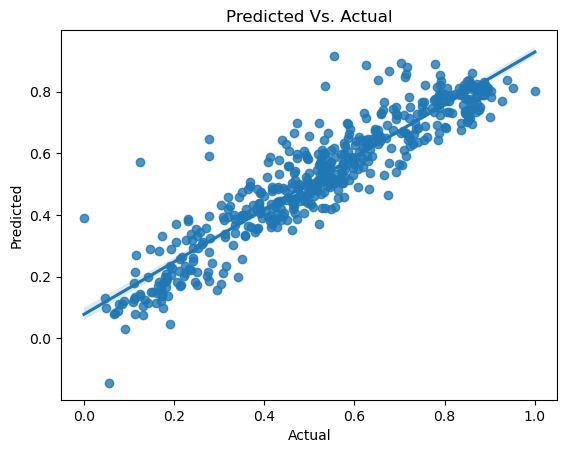

In [734]:
sns.regplot(x=y_train, y=y_train_cnt)
plt.title('Predicted Vs. Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### Making Predictions Using the Final Model

#### Scaling on test sets
- Rescale test DS <br>
- Fit train ds <br>
- Transform test ds <br>

In [735]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 585 to 360
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   yr                       214 non-null    int64  
 1   holiday                  214 non-null    int64  
 2   workingday               214 non-null    int64  
 3   temp                     214 non-null    float64
 4   hum                      214 non-null    float64
 5   windspeed                214 non-null    float64
 6   cnt                      214 non-null    int64  
 7   spring                   214 non-null    uint8  
 8   summer                   214 non-null    uint8  
 9   winter                   214 non-null    uint8  
 10  Aug                      214 non-null    uint8  
 11  Dec                      214 non-null    uint8  
 12  Feb                      214 non-null    uint8  
 13  Jan                      214 non-null    uint8  
 14  Jul                     

In [736]:
#Create a a list of num variables
# from sklearn.preprocessing import MinMaxScaler


# scaler = MinMaxScaler()
num_vars = ['temp','hum','windspeed','cnt']
# Fit on data - test data set should only be transformed and fit should be done only on training data set
data_test[num_vars] = scaler.transform(data_test[num_vars])
data_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain/Thunderstorm,Misty
585,1,0,1,0.868126,0.476238,0.386691,0.835711,0,0,0,...,0,0,0,0,0,1,0,0,0,0
717,1,0,1,0.340632,0.483721,0.467646,0.603428,0,0,1,...,0,0,0,0,0,0,0,1,0,0
294,0,0,0,0.452776,0.489332,0.203239,0.493097,0,0,1,...,1,0,0,1,0,0,0,0,0,0
157,0,0,1,0.807900,0.442568,0.478392,0.553497,0,1,0,...,0,0,0,0,0,0,1,0,0,0
627,1,0,1,0.607495,0.473120,0.276987,0.885642,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [737]:
data_test.head(5)

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain/Thunderstorm,Misty
585,1,0,1,0.868126,0.476238,0.386691,0.835711,0,0,0,...,0,0,0,0,0,1,0,0,0,0
717,1,0,1,0.340632,0.483721,0.467646,0.603428,0,0,1,...,0,0,0,0,0,0,0,1,0,0
294,0,0,0,0.452776,0.489332,0.203239,0.493097,0,0,1,...,1,0,0,1,0,0,0,0,0,0
157,0,0,1,0.807900,0.442568,0.478392,0.553497,0,1,0,...,0,0,0,0,0,0,1,0,0,0
627,1,0,1,0.607495,0.473120,0.276987,0.885642,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [738]:
X_test = data_test
y_test = X_test.pop('cnt')

In [739]:
y_test.head()

585    0.835711
717    0.603428
294    0.493097
157    0.553497
627    0.885642
Name: cnt, dtype: float64

In [740]:
# Model Prediction

# Creating X_test_new dataframe by dropping variables from X_test
X_test_sm = sm.add_constant(X_test)
X_test_new = X_test_sm[X_train_rfe.columns]
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 585 to 360
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   const                    214 non-null    float64
 1   yr                       214 non-null    int64  
 2   workingday               214 non-null    int64  
 3   temp                     214 non-null    float64
 4   hum                      214 non-null    float64
 5   windspeed                214 non-null    float64
 6   spring                   214 non-null    uint8  
 7   winter                   214 non-null    uint8  
 8   Dec                      214 non-null    uint8  
 9   Jan                      214 non-null    uint8  
 10  Sep                      214 non-null    uint8  
 11  Saturday                 214 non-null    uint8  
 12  Light Rain/Thunderstorm  214 non-null    uint8  
dtypes: float64(4), int64(2), uint8(7)
memory usage: 13.2 KB


In [741]:
X_test_new.head()

,const,yr,workingday,temp,hum,windspeed,spring,winter,Dec,Jan,Sep,Saturday,Light Rain/Thunderstorm
585,1.0,1,1,0.868126,0.476238,0.386691,0,0,0,0,0,0,0
717,1.0,1,1,0.340632,0.483721,0.467646,0,1,1,0,0,0,0
294,1.0,0,0,0.452776,0.489332,0.203239,0,1,0,0,0,1,0
157,1.0,0,1,0.807900,0.442568,0.478392,0,0,0,0,0,0,0
627,1.0,1,1,0.607495,0.473120,0.276987,0,0,0,0,1,0,0


In [742]:
# Making predictions
y_test_pred = lm.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_test_pred')

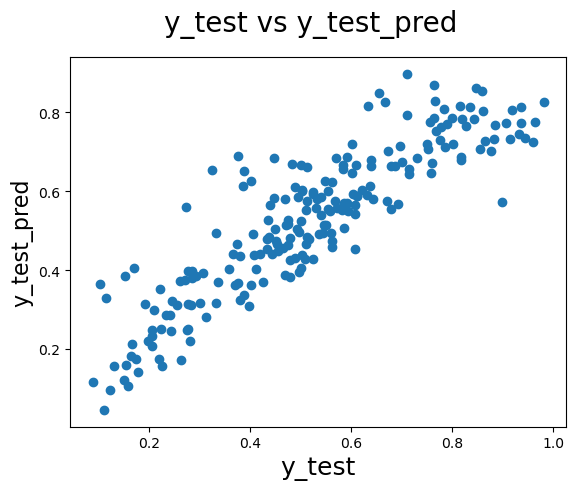

In [744]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

### RMSE

In [745]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7813828938083687

R^2 of test set is 0.78

Observation : Our model has predicted an R^2 value of 85 and the test set has predicted the value of 78 and the above graph also shows that the model explains the changes in demand.

In [746]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     229.8
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          2.68e-191
Time:                        21:48:18   Log-Likelihood:                 512.39
No. Observations:                 498   AIC:                            -998.8
Df Residuals:                     485   BIC:                            -944.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Conclusion

We used Recursive Feature Elimination for selecting the variables  :<br>
Then we removed based on below criteria.<br>
High p-value and high VIF - remove the variable<br>
High p-value and low VIF - remove next<br>
Low p-value and high VIF - remove after the 1st 2 steps<br>
Low p-value and low VIF - Keep the variables<br>
After following the above steps of elimination our model gave us an R-Square value of 85 percent.<br>
Variables Significance<br>
cnt = 0.2889 + (0.2272)yr + (0.0510)workingday + (-0.1162)windspeed +(-0.1082)spring+(0.0612)winter+(-0.0443)Dec+(-0.0456)Jan+(0.0670)Saturday+(-0.1825)Light Rain/Thunderstorm+(-0.1683)hum+(0.4272)temp+(0.0542)Sep+(0.0664)Saturday<br>
considering variables 'temp','hum','windspeed' and 'cnt' are normalized using min-max scaler b/w the values 0-1.<br>
#### Statistically significant and important predictor variables are as follows:                    
 1   yr                       
 2   workingday               
 3   temp                     
 4   hum                      
 5   windspeed                
 6   spring                     
 7   winter                   
 8   Dec                       
 9   Jan                      
 10  Sep                        
 11  Saturday                 
 12  Light Rain/Thunderstorm